<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/MLM_implementation_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Design Matrix X:**
 This is the design matrix for the fixed effect (e.g., hours studied). The first column is all ones to account for the intercept, and the second column represents the number of hours studied by each individual.
- **Design Matrix Z:**This is the design matrix for the random effect, indicating which group each individual belongs to. It has one column for each group, with a 1 for the respective group and 0 elsewhere.
- **True Coefficients:** The true fixed effect coefficients (
$ 𝛽_{true} $ ) and random effects ($ u_{true} $)
​are used to generate the response variable
𝑦.
- **Variance-Covariance Matrix 𝑉 :**
This matrix is constructed from the variance of the random effects (
𝐺) and the variance of the residual errors (𝑅). It accounts for the total variability in the data.

The fixed effects 𝛽 are estimated using Generalized Least Squares (GLS).
The random effects 𝑢 are estimated using the BLUP formula, which combines information from both the observed data and the estimated fixed effects.

In [ ]:
import numpy as np
import scipy.linalg

# Toy data: 2 groups with 4 data points in each
n_groups = 2
n_per_group = 4

# Fixed effect (predictor): hours studied for each individual
X = np.array([[1, 1.0],  # Group 1, individual 1
              [1, 2.0],  # Group 1, individual 2
              [1, 3.0],  # Group 1, individual 3
              [1, 4.0],  # Group 1, individual 4
              [1, 1.5],  # Group 2, individual 1
              [1, 2.5],  # Group 2, individual 2
              [1, 3.5],  # Group 2, individual 3
              [1, 4.5]]) # Group 2, individual 4

# Random effect design matrix (indicating group membership)
Z = np.array([[1, 0],  # Group 1 random effect
              [1, 0],
              [1, 0],
              [1, 0],
              [0, 1],  # Group 2 random effect
              [0, 1],
              [0, 1],
              [0, 1]])

# True fixed effect coefficient and random effect for each group
beta_true = np.array([2.0, 1.5])  # Intercept = 2, slope for hours studied = 1.5
u_true = np.array([0.5, -0.5])    # Random intercepts for Group 1 and Group 2

# Generate response variable y (fixed + random + noise)
y = X @ beta_true + Z @ u_true + np.random.normal(0, 0.1, size=8)

# Display the data
print("Design Matrix X (fixed effects):")
print(X)
print("\nDesign Matrix Z (random effects):")
print(Z)
print("\nResponse Vector y:")
print(y)

# Covariance matrices for random effects and residuals
sigma_u = 0.5  # Variance of random effects
sigma_e = 0.1  # Variance of residuals (noise)

# Construct the variance-covariance matrix V
G = sigma_u**2 * np.eye(n_groups)  # Variance of random effects
R = sigma_e**2 * np.eye(n_per_group * n_groups)  # Residual variance (noise)

V = Z @ G @ Z.T + R  # Total covariance matrix

# Generalized least squares solution for fixed effects
# beta_hat = (X^T V^(-1) X)^(-1) X^T V^(-1) y
V_inv = np.linalg.inv(V)
beta_hat = np.linalg.inv(X.T @ V_inv @ X) @ (X.T @ V_inv @ y)

# Solve for random effects using BLUP (Best Linear Unbiased Predictor)
# u_hat = G Z^T V^(-1) (y - X beta_hat)
u_hat = G @ Z.T @ V_inv @ (y - X @ beta_hat)

# Output estimated fixed and random effects
print("\nEstimated fixed effects (beta_hat):")
print(beta_hat)

print("\nEstimated random effects (u_hat):")
print(u_hat)


Design Matrix X (fixed effects):
[[1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  4. ]
 [1.  1.5]
 [1.  2.5]
 [1.  3.5]
 [1.  4.5]]

Design Matrix Z (random effects):
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]

Response Vector y:
[3.80815521 5.64923602 6.87730024 8.36500538 3.92544729 5.09324152
 6.77277058 8.29018238]

Estimated fixed effects (beta_hat):
[2.02015861 1.48273044]

Estimated random effects (u_hat):
[ 0.44350445 -0.44350445]


**Visualization**

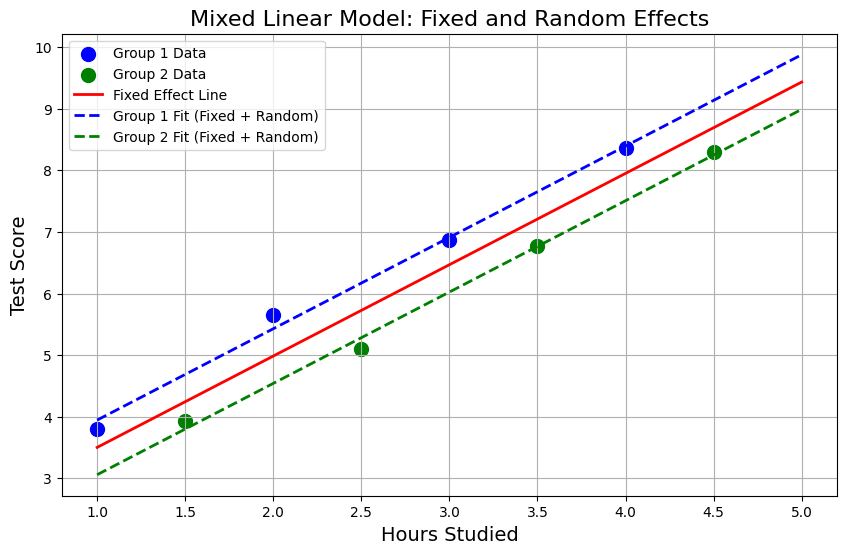

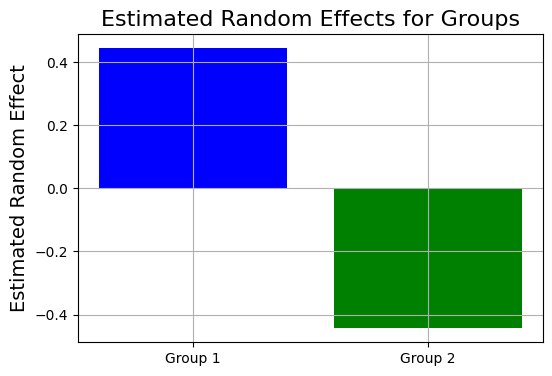

In [ ]:
import matplotlib.pyplot as plt

# Group labels for visualization
group_labels = ['Group 1', 'Group 2']

# Plot actual data points and fitted fixed effect line
plt.figure(figsize=(10, 6))

# Plot Group 1 data points
plt.scatter(X[:4, 1], y[:4], color='blue', label='Group 1 Data', s=100)
# Plot Group 2 data points
plt.scatter(X[4:, 1], y[4:], color='green', label='Group 2 Data', s=100)

# Plot the fitted fixed effects line
x_line = np.linspace(1, 5, 100)
y_fixed = beta_hat[0] + beta_hat[1] * x_line
plt.plot(x_line, y_fixed, label='Fixed Effect Line', color='red', linewidth=2)

# Add random effects to the fixed line for Group 1 and Group 2
y_group1 = beta_hat[0] + u_hat[0] + beta_hat[1] * x_line
y_group2 = beta_hat[0] + u_hat[1] + beta_hat[1] * x_line

plt.plot(x_line, y_group1, label='Group 1 Fit (Fixed + Random)', color='blue', linestyle='--', linewidth=2)
plt.plot(x_line, y_group2, label='Group 2 Fit (Fixed + Random)', color='green', linestyle='--', linewidth=2)

# Customize plot
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Test Score', fontsize=14)
plt.title('Mixed Linear Model: Fixed and Random Effects', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Bar plot to visualize estimated random effects for each group
plt.figure(figsize=(6, 4))
plt.bar(group_labels, u_hat, color=['blue', 'green'])
plt.ylabel('Estimated Random Effect', fontsize=14)
plt.title('Estimated Random Effects for Groups', fontsize=16)
plt.grid(True)
plt.show()



- The slope $ \beta_1 $ is the same for all groups, meaning that for every additional unit of the predictor, the expected increase in the response is the same, regradless of the group.
- The intercept $\beta_0 + u_j $ differs for each group. The intercept is shifted by the random effect $u_j$, which captures the group specific deviation from the over all intercept.

### **Random Intercept and Random Slope Model**
In this case, the response
𝑦 is modeled as:
$$
y_{ij} = \beta_0 + u_{0j} + (\beta_1 + u_{1j})X_{ij} +\epsilon_{ij}
$$
where
- $y_{ij}$ is the outcome for the $i$-th observation in the $j$ -th group,
- $ \beta_0$ is the fixed intercept (common to all groups),
- $ u_j $ is the random intercept for the group $j$( specific to each group),
- $\beta_1$ is the fixed slope (same across all groups),
- $ X_{ij} $ is the predictor for the $i$ -th observation in the $j$ -th group,
- $\epsilon_{ij}$ is the residual error for each observation.

In this model, intercepts vary across groups ($\beta_0 + u_{0j}$) and slopes vary across groups by ($\beta_1 + u_{1j}$).

Design Matrix X (fixed effects):
[[1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  4. ]
 [1.  1.5]
 [1.  2.5]
 [1.  3.5]
 [1.  4.5]]

Response Vector y:
[3.9416133  5.51575243 7.07670088 8.41871706 3.62307378 4.66473714
 6.10958515 7.18103024]


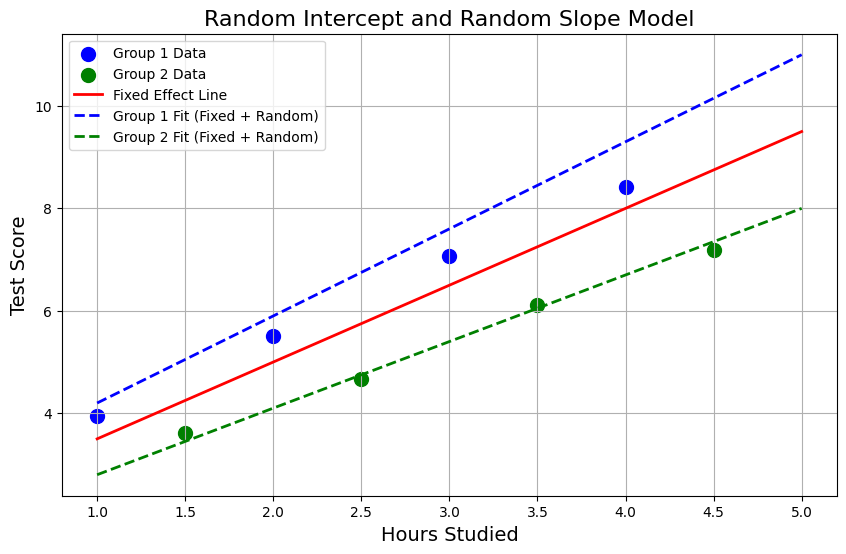

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Toy data: 2 groups with 4 data points in each
n_groups = 2
n_per_group = 4

# Fixed effect (predictor): hours studied for each individual
X = np.array([[1, 1.0],  # Group 1, individual 1
              [1, 2.0],  # Group 1, individual 2
              [1, 3.0],  # Group 1, individual 3
              [1, 4.0],  # Group 1, individual 4
              [1, 1.5],  # Group 2, individual 1
              [1, 2.5],  # Group 2, individual 2
              [1, 3.5],  # Group 2, individual 3
              [1, 4.5]]) # Group 2, individual 4

# Random effect design matrix (indicating group membership)
Z_intercept = np.array([[1, 0],  # Group 1 random intercept
                        [1, 0],
                        [1, 0],
                        [1, 0],
                        [0, 1],  # Group 2 random intercept
                        [0, 1],
                        [0, 1],
                        [0, 1]])

Z_slope = np.array([[1, 0],  # Group 1 random slope
                    [1, 0],
                    [1, 0],
                    [1, 0],
                    [0, 1],  # Group 2 random slope
                    [0, 1],
                    [0, 1],
                    [0, 1]])

# True fixed effects (intercept and slope)
beta_true = np.array([2.0, 1.5])  # Intercept = 2, slope = 1.5

# True random intercepts and slopes for each group
u_intercepts = np.array([0.5, -0.5])  # Random intercepts for Group 1 and Group 2
u_slopes = np.array([0.2, -0.2])      # Random slopes for Group 1 and Group 2

# Generate response variable y (fixed + random intercepts/slopes + noise)
y = X @ beta_true + Z_intercept @ u_intercepts + Z_slope[:, 1] * u_slopes[1] * X[:, 1] + np.random.normal(0, 0.1, size=8)

# Display the data
print("Design Matrix X (fixed effects):")
print(X)
print("\nResponse Vector y:")
print(y)

# Visualize the data with random intercepts and slopes
plt.figure(figsize=(10, 6))

# Plot Group 1 data points
plt.scatter(X[:4, 1], y[:4], color='blue', label='Group 1 Data', s=100)
# Plot Group 2 data points
plt.scatter(X[4:, 1], y[4:], color='green', label='Group 2 Data', s=100)

# Plot the fitted fixed effects line (without random effects)
x_line = np.linspace(1, 5, 100)
y_fixed = beta_true[0] + beta_true[1] * x_line
plt.plot(x_line, y_fixed, label='Fixed Effect Line', color='red', linewidth=2)

# Plot the group-specific lines with random intercepts and slopes
y_group1 = (beta_true[0] + u_intercepts[0]) + (beta_true[1] + u_slopes[0]) * x_line
y_group2 = (beta_true[0] + u_intercepts[1]) + (beta_true[1] + u_slopes[1]) * x_line

plt.plot(x_line, y_group1, label='Group 1 Fit (Fixed + Random)', color='blue', linestyle='--', linewidth=2)
plt.plot(x_line, y_group2, label='Group 2 Fit (Fixed + Random)', color='green', linestyle='--', linewidth=2)

# Customize plot
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Test Score', fontsize=14)
plt.title('Random Intercept and Random Slope Model', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


- **Design Matrix  𝑋 :** This remains the same as in the previous example.
- **Random Intercepts $ Z_{intercept}$:** This matrix assigns a random intercept to each group (just like before).
- **Random Slopes $ Z_{slope} $:** This matrix assigns a random slope to each group. The random slope will vary the relationship between the predictor and response within each group.
- **Response $y$ :** The response variable is generated using the true fixed effects, random intercepts, and random slopes. A small amount of noise is added.
- **Visualization:** The scatter plot shows the actual data points for each group, while the dashed lines show the fitted lines for each group, incorporating both the random intercept and random slope.

* The red line shows the fixed effects line (the common intercept and slope across all data).
* The blue dashed line (Group 1) and the green dashed line (Group 2) show the fitted lines for each group, which include both the random intercept and the random slope. These lines have different slopes and intercepts.


The intercept of the line for each group is shifted by a group-specific random intercept. For example, Group 1's intercept might be higher than the global intercept, while Group 2's is lower.

The slope for each group is also allowed to vary. For example, Group 1's line might be steeper than the overall slope, while Group 2's line might be flatter or even negative.

### **Multiple Random Effects**
To expand the model to handle multiple random effects, we need to incorporate multiple levels of variability in the model. These random effects could include random intercepts and slopes for different predictors or nested hierarchical structures where random effects operate at different levels.

Here, we'll focus on a model with:



1.   Random intercepts and slopes for two predictors (X1 and X2) for each group.
2.   Allowing for correlations between the random effects.
3.   Incorporating multiple random effects that capture variations in both the intercept and slopes for each group.

### **Expanded Random Effects Model**
For two predictors $ X_1 $ and $ X_2 $ , the model with multiple random effects is:

$$
y_{ij} = (\beta_0 + u_{0j}) + (\beta_1 + u_{1j}) X_{1ij} + (\beta_2 + u_{2j}) X_{2ij} + \epsilon_{ij}
$$

Where:


*   $ \beta_0 $ is the fixed intercept - common across all groups
*   $ \beta_1 $ and $\beta_2$ are fixed slopes for predictors $ X_1$ and $X_2$
*   $ u_{0j}, u_{1j},$ and $ u_{2j}$ are random intercepts and slopes for group $j$, allowing intercepts and slopes for both $X_1$ and $X_2$ to vary between groups,
* $ \epsilon_{ij} $ is the residual error.


We assume the random effects  $\mathbf{u}_j =[u_{0j},u_{1j},u_{2j}]$ are drawn from a multivariate normal distribution with the covariance matrix:

$$
\mathbf{u}_j \sim N\left( \mathbf{0}, \mathbf{G} \right)
$$

Where $ \mathbf{G} $ is the covariance matrix that describes the variances and covariances between the random intercepts and slopes:

$$
\mathbf{G} = \begin{bmatrix}
\sigma^2_{u_0} & \sigma_{u_0 u_1} & \sigma_{u_0 u_2} \\
\sigma_{u_0 u_1} & \sigma^2_{u_1} & \sigma_{u_1 u_2} \\
\sigma_{u_0 u_2} & \sigma_{u_1 u_2} & \sigma^2_{u_2}
\end{bmatrix}
$$

### **Complete Model**
$$
y_{ij} = \beta_0 + \beta_1 X_{1ij} + \beta_2  X_{2ij} + u_{0j} + u_{1j} X_{1ij} +  + u_{2j} X_{2ij} + \epsilon_{ij}
$$

Where:

* $ u_{0j},u_{1j},$ and $u_{2j}$ are group specific random intercepts and slopes.
* $ \epsilon_{ij} \sim N\left(0,\sigma^2\right) $ represents the independent errors.


### **Covariance of Random Effects**

The covariance structure between random intercepts and slopes is modeled as:

$$
\mathbf{u}_{j} \sim N\left(0,
\begin{bmatrix}
\sigma^2_{u_0} & \sigma_{u_0 u_1} & \sigma_{u_0 u_2} \\
\sigma_{u_0 u_1} & \sigma^2_{u_1} & \sigma_{u_1 u_2} \\
\sigma_{u_0 u_2} & \sigma_{u_1 u_2} & \sigma^2_{u_2}
\end{bmatrix}
\right)
$$

This structure allows the random intercepts and slopes to vary jointly, capturing the dependencies between different random effects.



### **Python Code for a Multiple Random Effects Model**

To implement a multiple random effects model in Python, we can use the ```statsmodels``` library, which provides an interface for fitting Linear Mixed Models (LMM) through the ```MixedLM``` class.

Below example will demonstrate how to incorporate both random intercepts and random slopes for two predictors.

First, we'll simulate a dataset with two groups, two predictors, and both random intercepts and slopes for the two predictors.
Then, we'll fit the model using ```statsmodels```.

The output will include:
- Estimates of the **fixed effects** (`Intercept`, `X1`, and `X2` coefficients).
- Estimates of the **random effects** for each group, including the variances and covariances of the random intercepts and slopes.
- Model fit statistics such as the log-likelihood, AIC, and BIC.


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Simulate data for two groups with random intercepts and slopes
np.random.seed(42)

n_groups = 2
n_per_group = 8
n = n_groups * n_per_group

# Group membership
groups = np.repeat(np.arange(n_groups), n_per_group)

# Predictors X1 and X2
X1 = np.random.uniform(1, 5, n)
X2 = np.random.uniform(70, 105, n)

# True fixed effects (intercept, slopes for X1 and X2)
beta_true = np.array([2.0, 1.5, 0.02])  # Intercept = 2, slope for X1 = 1.5, slope for X2 = 0.02

# Random effects covariance matrix for intercept and slopes (random intercepts and slopes for X1 and X2)
cov_matrix = np.array([[0.5, 0.1, 0.05],   # Variance of intercept and covariances
                       [0.1, 0.3, 0.02],   # Covariance and variance of slopes for X1
                       [0.05, 0.02, 0.2]]) # Covariance and variance of slopes for X2

# Generate random effects for each group
u_random = np.random.multivariate_normal([0, 0, 0], cov_matrix, size=n_groups)
u_intercepts = u_random[:, 0]  # Random intercepts
u_slopes_X1 = u_random[:, 1]   # Random slopes for X1
u_slopes_X2 = u_random[:, 2]   # Random slopes for X2

# Generate response variable y (fixed + random intercepts/slopes + noise)
y = (beta_true[0] + beta_true[1] * X1 + beta_true[2] * X2 +
     u_intercepts[groups] + u_slopes_X1[groups] * X1 + u_slopes_X2[groups] * X2 +
     np.random.normal(0, 0.1, n))

# Create a DataFrame for the data
data = pd.DataFrame({'y': y, 'X1': X1, 'X2': X2, 'group': groups})

# Fit the mixed effects model with random intercepts and slopes
# 'y ~ X1 + X2' specifies the fixed effects part, 'group' is the grouping variable
# '0 + C(group)' specifies the random effects: one random intercept and one slope for each group
model = MixedLM.from_formula('y ~ X1 + X2', groups='group',
                             re_formula='1 + X1 + X2', data=data)

# Fit the model
#result = model.fit()
#result = model.fit(maxiter=1000)
result = model.fit(method='lbfgs', maxiter=2000)

# Print the summary of the fitted model
print(result.summary())


          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  y      
No. Observations:   16       Method:              REML   
No. Groups:         2        Scale:               0.0173 
Min. group size:    8        Log-Likelihood:      -6.0087
Max. group size:    8        Converged:           Yes    
Mean group size:    8.0                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       1.491    0.522  2.855 0.004  0.467  2.514
X1              1.417    0.368  3.846 0.000  0.695  2.139
X2             -0.409    0.273 -1.503 0.133 -0.944  0.125
group Var       0.048    1.946                           
group x X1 Cov  0.040                                    
X1 Var          0.270                                    
group x X2 Cov  0.017                                    
X1 x X2 Cov     0.194   

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### Explanation of the Code:

1. **Simulated Data**:
   - We generate two predictors `X1` and `X2`.
   - We define **fixed effects**: `beta_true = [2.0, 1.5, 0.02]`, representing the intercept and the slopes for `X1` and `X2`.
   - We define **random effects**: for each group, there are random intercepts and random slopes for both `X1` and `X2`, drawn from a multivariate normal distribution with a specified covariance matrix (`cov_matrix`).

2. **Response Variable**:
   - The response variable `y` is generated as a combination of the fixed effects and the group-specific random effects, with some added Gaussian noise.

3. **Model Fitting**:
   - We fit a **Linear Mixed Model** using the `MixedLM.from_formula()` function from `statsmodels`. The formula `'y ~ X1 + X2'` specifies the fixed effects part of the model.
   - The `re_formula='1 + X1 + X2'` part defines the random effects, allowing both random intercepts and random slopes for `X1` and `X2` for each group.

4. **Output**:
   - The `result.summary()` gives a detailed summary of the fitted model, including estimates for the fixed and random effects.
